In [1]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [49]:
%run closuresim.py

# Closure Simulations

The purpose of this simulation is to see if a lack of redundancy in the telescope can cause a similar effect to what I see in the HERA data.

We will start by generating some electric fields at locations that correspond to a HERA-like layout. We will use a gaussian beam first, then switch to using a different beam for each telescope and see what happens.

Then we will look at different sky layouts and how that shakes things up.

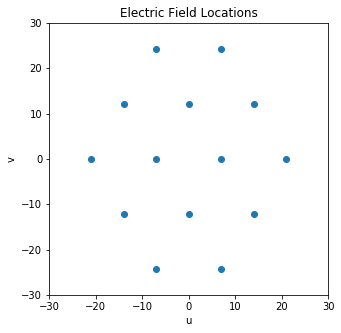

In [3]:
locs = generate_hera_layout_simple()
us = locs[:,0]
vs = locs[:,1]
ws = locs[:,2]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us,vs)
ax.set_title('Electric Field Locations')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_xlabel('u'); ax.set_ylabel('v');# ax.set_zlabel('v'); 

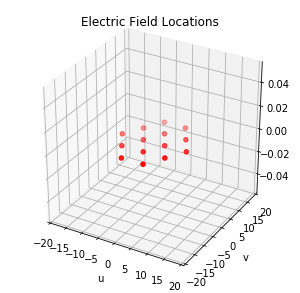

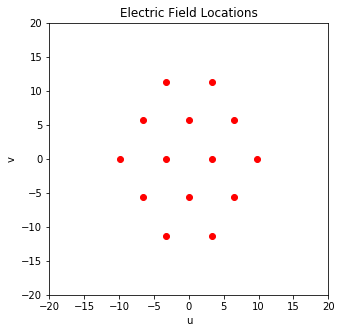

In [4]:
frequency = 140e6 # Let's just do this in a single channel for now.
chan_bw = 25e3

wavelength = 3e8 / frequency

locs_uvw = locs/wavelength

us_uvw = locs_uvw[:,0]
vs_uvw = locs_uvw[:,1]
ws_uvw = locs_uvw[:,2]

fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': '3d'})
ax.scatter(us_uvw,vs_uvw,ws_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us_uvw,vs_uvw,color='red')
ax.set_title('Electric Field Locations')
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.set_xlabel('u'); ax.set_ylabel('v');
plt.show()

Now let's try and generate some sort of beam to work with.

(2000,)


/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


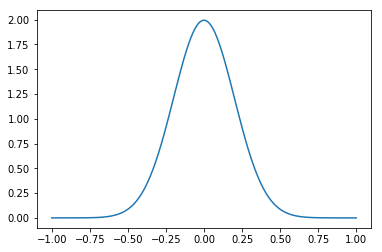

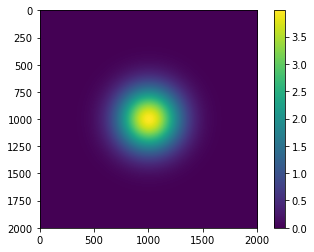

In [5]:
angle, beam = generate_gaussian_beam()
print(angle.shape)
plt.plot(angle, beam)
plt.show()

# 2D one too

beam_re = numpy.outer(beam.real,beam.real.T)
beam_im = numpy.outer(beam.imag,beam.imag.T)
#beam_2D = numpy.outer(beam,beam.T.conj())
beam_2D = beam_re + 1j * beam_im
plt.imshow(beam_2D.real)
plt.colorbar()
plt.show()

In [31]:
points = [[0.2,0.2,80],[0.05,0.3,40],[-0.45,0.45,790],[0.45,0.45,100],[0.45,-0.45,100],
          [-0.45,-0.45,100],[0.5,0.0,100],[0.0,0.5,80],[-0.5,0.0,100],[-0.5,-0.5,100],
          [-0.8,0.0,100],[0.8,0.0,100],[0.21,0.21,80],[0.205,0.205,100]]
#points = [[0.1,0.2,100]]
#points = [[0.0,0.0,1],[0.48,0.49,4],[0.47,0.49,4],[0.48,0.48,4]]
print(beam.shape)
efields = simulate_electric_fields_gaussianbeam(locs_uvw,numpy.asarray(points),beam[:,numpy.newaxis])

(2000,)
(14,)
('BEAM Shape: ', 2000)
0.2
0.2
0.001
('BEAM Shape: ', 2000)
0.05
0.3
0.001
('BEAM Shape: ', 2000)
-0.45
0.45
0.001
('BEAM Shape: ', 2000)
0.45
0.45
0.001
('BEAM Shape: ', 2000)
0.45
-0.45
0.001
('BEAM Shape: ', 2000)
-0.45
-0.45
0.001
('BEAM Shape: ', 2000)
0.5
0.0
0.001
('BEAM Shape: ', 2000)
0.0
0.5
0.001
('BEAM Shape: ', 2000)
-0.5
0.0
0.001
('BEAM Shape: ', 2000)
-0.5
-0.5
0.001
('BEAM Shape: ', 2000)
-0.8
0.0
0.001
('BEAM Shape: ', 2000)
0.8
0.0
0.001
('BEAM Shape: ', 2000)
0.21
0.21
0.001
('BEAM Shape: ', 2000)
0.205
0.205
0.001
('BEAM Shape: ', 2000)
0.2
0.2
0.001
('BEAM Shape: ', 2000)
0.05
0.3
0.001
('BEAM Shape: ', 2000)
-0.45
0.45
0.001
('BEAM Shape: ', 2000)
0.45
0.45
0.001
('BEAM Shape: ', 2000)
0.45
-0.45
0.001
('BEAM Shape: ', 2000)
-0.45
-0.45
0.001
('BEAM Shape: ', 2000)
0.5
0.0
0.001
('BEAM Shape: ', 2000)
0.0
0.5
0.001
('BEAM Shape: ', 2000)
-0.5
0.0
0.001
('BEAM Shape: ', 2000)
-0.5
-0.5
0.001
('BEAM Shape: ', 2000)
-0.8
0.0
0.001
('BEAM Shape: ', 2000

In [32]:
print(efields)
print(numpy.abs(efields))
print(locs_uvw)

[-505.52115914-516.311244j   -138.60754266+474.63809921j
 -597.41322868+192.81457592j  472.04710334+385.04580045j
  -20.20883591-626.59035192j  -21.42969663+637.97407036j
  546.36490036-371.24237293j -546.36490036-371.24237293j
   21.42969663+637.97407036j   20.20883591-626.59035192j
 -472.04710334+385.04580045j  597.41322868+192.81457592j
  138.60754266+474.63809921j  505.52115914-516.311244j  ]
[722.58490367 494.46271457 627.75793623 609.17053131 626.91615561
 638.33388312 660.55696484 660.55696484 638.33388312 626.91615561
 609.17053131 627.75793623 494.46271457 722.58490367]
[[ -3.26666667  11.31601333   0.        ]
 [  3.26666667  11.31601333   0.        ]
 [ -6.53333333   5.65800667   0.        ]
 [  0.           5.65800667   0.        ]
 [  6.53333333   5.65800667   0.        ]
 [ -9.8          0.           0.        ]
 [ -3.26666667   0.           0.        ]
 [  3.26666667   0.           0.        ]
 [  9.8          0.           0.        ]
 [ -6.53333333  -5.65800667   0.    

DFT Sky to see what it looks like

In [33]:
image = epic_image_dft(2,32,efields,locs_uvw)

-1.0
-0.96875
-0.9375
-0.90625
-0.875
-0.84375
-0.8125
-0.78125
-0.75
-0.71875
-0.6875
-0.65625
-0.625
-0.59375
-0.5625
-0.53125
-0.5
-0.46875
-0.4375
-0.40625
-0.375
-0.34375
-0.3125
-0.28125
-0.25
-0.21875
-0.1875
-0.15625
-0.125
-0.09375
-0.0625
-0.03125
0.0
0.03125
0.0625
0.09375
0.125
0.15625
0.1875
0.21875
0.25
0.28125
0.3125
0.34375
0.375
0.40625
0.4375
0.46875
0.5
0.53125
0.5625
0.59375
0.625
0.65625
0.6875
0.71875
0.75
0.78125
0.8125
0.84375
0.875
0.90625
0.9375
0.96875


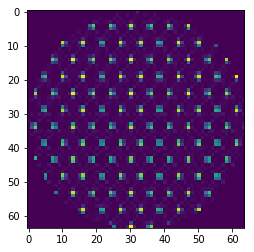

In [34]:
plt.imshow((image * image.conj()).real)
plt.show()

Dreadful but expected considering HERA's PSF is rubbish.

## Visibilities

Let's start making some visibilities up

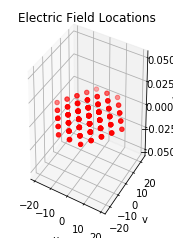

In [35]:
visibilities = numpy.outer(efields,efields.T.conj())
baselines = generate_baseline_vectors(locs_uvw)
plot_baselines(baselines)

In [36]:
baselines_ew_14m = numpy.asarray([[0,1],[2,3],[3,4],[5,6]])
visibilities_ew_14m = visibilities[baselines_ew_14m[:,0],baselines_ew_14m[:,1]]

In [37]:
print(visibilities.shape)

(14, 14)


## Closure Phases

Closure phases can be generated by multipling three visibilities from a set of baselines comprising three antennas in a closed geometric triangle.

The phase of the resulting complex number is taken and provides our closure phase for each 'triad'

Should do as Bojan does and just give each antenna an id, in this case comensurate with its position in the array and extract the baselines I care about. 



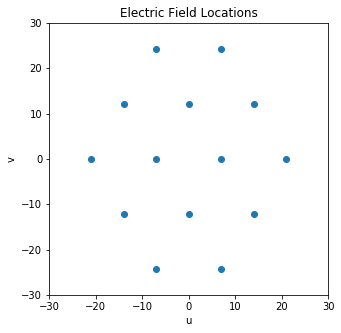

In [38]:
us = locs[:,0]
vs = locs[:,1]
ws = locs[:,2]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(us,vs)
ax.set_title('Electric Field Locations')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_xlabel('u'); ax.set_ylabel('v');# ax.set_zlabel('v'); 

In [39]:
List_of_antennas = [[[0,2],[2,3],[3,0]],
                    [[1,3],[3,4],[4,1]],
                    [[2,5],[5,6],[6,2]],
                    [[3,6],[6,7],[7,3]],
                    [[4,7],[7,8],[8,4]],
                    [[6,9],[9,10],[10,6]],
                    [[7,10],[10,11],[11,7]],
                    [[10,12],[12,13],[13,10]]]

In [40]:
closures = generate_closure_triads(visibilities,List_of_antennas)
closures1 = generate_closure_triads_tp(visibilities,List_of_antennas)

(1.10815199844396, 2.145160746660775, 3.0298725620748512)
(1.1706860442676241, 2.2872744450319193, 2.825224817880043)
(1.2250240373458672, 2.201192860093073, 2.856968409740646)
(1.2810561507781655, 1.9479548001585536, 3.0541743562428674)
(0.9417365059048001, 2.201192860093073, 3.1402559411817133)
(0.9417365059048001, 2.2872744450319193, 3.0541743562428674)
(1.2810561507781655, 2.145160746660775, 2.856968409740646)
(1.1706860442676241, 2.082626700837111, 3.0298725620748512)


In [41]:
print(closures)
print(closures1)

[6.28318531 6.28318531 6.28318531 6.28318531 6.28318531 6.28318531
 6.28318531 6.28318531]
[-2.61932888e-17  5.60875155e-17  0.00000000e+00  5.66162519e-17
  1.07107595e-16  1.88566265e-16  6.26869649e-17 -6.33284148e-17]


Zero closures? Seems suspicious. Let's try screwing up the beam shapes and see what happens.
Let's make a different gaussian beam for each antenna and see what happens.

In [42]:
x,beams = generate_beam_per_antenna(locs,0.9,1.1)

In [43]:
print(beams.shape)
print(beams[2])

(14, 2000)
[0.24193777+0.23976171j 0.24218552+0.24005054j 0.24243328+0.24033944j ...
 0.24243328+0.24033944j 0.24218552+0.24005054j 0.24193777+0.23976171j]


In [44]:
#beams[7,:] = 0.0

efields_db = simulate_electric_fields_different_beams(locs_uvw,numpy.asarray(points),beam[:,numpy.newaxis])
print(efields_db)


(14,)
('BEAM Shape: ', 1)
0.2
0.2
2.0


IndexError: too many indices for array

In [45]:
visibilities_db = numpy.outer(efields_db,efields_db.T.conj()) 

# Show how adding a correlated noise breaks the closure relationship.
visibilities_db = visibilities_db + 5*(numpy.random.randn(visibilities_db.shape[0],visibilities_db.shape[1]) + 1j*numpy.random.randn(visibilities_db.shape[0],visibilities_db.shape[1]))

NameError: name 'efields_db' is not defined

In [46]:
closures_db = generate_closure_triads(visibilities_db,List_of_antennas)
closures_db1 = generate_closure_triads_tp(visibilities_db,List_of_antennas)

NameError: name 'visibilities_db' is not defined

In [22]:
print(closures_db)
print(closures_db1)

[ 4.95060278e-04 -3.80315538e-04 -1.22637947e-04 -3.16727699e-04
 -1.02014955e-04 -9.75491072e-05 -3.77659458e-05 -2.56427666e-04]
[ 4.95060278e-04 -3.80315538e-04 -1.22637947e-04 -3.16727699e-04
 -1.02014955e-04 -9.75491072e-05 -3.77659458e-05 -2.56427666e-04]


# This makes sense as I have only added direction-independent noise apart from each sources own phase. 

We can break closure by including correlated baseline terms, especially correlated baseline noise, which casuses closures to diverge. 

But the beam shapes require a more complicated sky model to explore.

## Let's try doing some continuum modelling

In [35]:
# Generate a sky model
# We assume this sky is an entire celestial hemisphere.
# Points are [[l1,m1,amp1],[l2,m2,amp2]]
# Continuum is in the form of [[l,m,support,scale,amp],...] The amp has some random fluctuation imposed on it
def generate_continuum_model(grid_size,points,continuum):
    
    # Each axis runs from -1 to 1, l/m respectively.
    sky = numpy.zeros(shape=(grid_size,grid_size),dtype=numpy.complex128)
    
    lm_step = 2/grid_size
    
    # First generate points
    for j,point in enumerate(points):
        
        l = point[0]
        m = point[1]
        if(l**2 + m**2 > 1):
            continue
        lc = int(numpy.floor(l/lm_step) - grid_size/2)
        mc = int(numpy.floor(m/lm_step) - grid_size/2)
        
        point_phase = numpy.random.uniform(0,2*numpy.pi)
        sky[mc,lc] += point[2] * numpy.exp(point_phase)
        
    # Now place down continuum emission
    for j,contin in enumerate(continuum):
    
        l = contin[0]
        m = contin[1]
        support=contin[2]
        scale = contin[3]
        amp = contin[4]
        x = numpy.linspace(-support//2,support//2,support)
        gaussian = amp * (norm.pdf(x, loc=0, scale=scale)) * norm.cdf(4*x,loc=0,scale=scale)
        gaussian2d = numpy.outer(gaussian,gaussian.T)
        
        lc = int(numpy.floor(l/lm_step) - grid_size/2)
        mc = int(numpy.floor(m/lm_step) - grid_size/2)
        for cm in numpy.arange(-support//2,support//2):           
            for cl in numpy.arange(-support//2,support//2):            
                sky[mc+cm,lc+cl] += gaussian2d[int(cm+support//2),int(cl+support//2)] * numpy.exp(-1j*numpy.random.uniform(0,numpy.pi/8))
                
    return sky
                
    
    

In [36]:
continuums = [[-0.01,-0.02,64,16,1000],[0.01,0.02,64,16,1000],[-0.4,-0.4,64,70,1000],[-0.5,0.2,16,9.5,1000],[-0.3,-0.1,64,7.2,1000]]

In [37]:
skycont = generate_continuum_model(512,points,continuums)

<function matplotlib.pyplot.show(*args, **kw)>

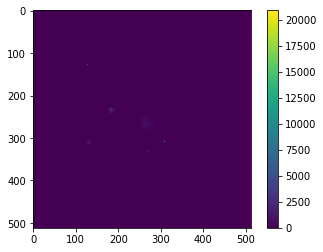

In [38]:
plt.imshow(numpy.real(skycont))
plt.colorbar()
plt.show

In [39]:
print(numpy.abs(visibilities))

[[1.59431434e-15 1.09098459e-15 1.38508773e-15 1.34407640e-15
  1.38323042e-15 1.40842254e-15 1.45745564e-15 1.45745564e-15
  1.40842254e-15 1.38323042e-15 1.34407640e-15 1.38508773e-15
  1.09098459e-15 1.59431434e-15]
 [1.09098459e-15 7.46557535e-16 9.47811440e-16 9.19747509e-16
  9.46540489e-16 9.63779383e-16 9.97332589e-16 9.97332589e-16
  9.63779383e-16 9.46540489e-16 9.19747509e-16 9.47811440e-16
  7.46557535e-16 1.09098459e-15]
 [1.38508773e-15 9.47811440e-16 1.20331854e-15 1.16768925e-15
  1.20170497e-15 1.22359106e-15 1.26618940e-15 1.26618940e-15
  1.22359106e-15 1.20170497e-15 1.16768925e-15 1.20331854e-15
  9.47811440e-16 1.38508773e-15]
 [1.34407640e-15 9.19747509e-16 1.16768925e-15 1.13311492e-15
  1.16612346e-15 1.18736152e-15 1.22869856e-15 1.22869856e-15
  1.18736152e-15 1.16612346e-15 1.13311492e-15 1.16768925e-15
  9.19747509e-16 1.34407640e-15]
 [1.38323042e-15 9.46540489e-16 1.20170497e-15 1.16612346e-15
  1.20009357e-15 1.22195031e-15 1.26449153e-15 1.26449153e-15


I mean it's not exactly something Carl Sagan would drool over but I think it should suffice to prove the mathematics here

In [40]:
# For simulating Electric Fields
def simulate_electric_fields_fromsky_gaussianbeam(locations_uvw,sky,beam):
    elec_ss = numpy.zeros(shape=(locations_uvw.shape[0]),dtype=numpy.complex128)
    grid_size = sky.shape[0]
    lm_step = 2/grid_size
    for i in numpy.arange(locations_uvw.shape[0]):
        #print(locations_uvw[i,:])
        #numpy.random.seed(12345)
        antenna_noise = 5000*(numpy.random.normal(scale=4000.0) + 1j * numpy.random.normal(scale=4000.0))
        #antenna_noise = 0
        
        for lc in numpy.arange(grid_size):
            l = (lc-grid_size//2) * lm_step
            for mc in numpy.arange(grid_size):
                m = (mc-grid_size//2) * lm_step
                if(l**2 + m**2 > 1):
                    continue
                n = numpy.sqrt(1.0-l**2-m**2) - 1.0
                u = locations_uvw[i,0]
                v = locations_uvw[i,1]
                w = locations_uvw[i,2]
                elec_ss[i] += sky[mc,lc]*numpy.exp(-2j*numpy.pi*(u*l+v*m+w*n)) * find_beam_at_point(beam,[l,m,0])
        elec_ss[i] += antenna_noise
    return elec_ss/grid_size**2

# For simulating Electric Fields
def simulate_electric_fields_fromsky_different_beams(locations_uvw,sky,beam_matrices):
    elec_ss = numpy.zeros(shape=(locations_uvw.shape[0]),dtype=numpy.complex128)
    grid_size = sky.shape[0]
    lm_step = 2/grid_size
    for i in numpy.arange(locations_uvw.shape[0]):
        
        antenna_noise = numpy.random.normal(scale=4000.0)# + 1j * numpy.random.normal(scale=2000.0)
        for lc in numpy.arange(grid_size):
            l = (lc-grid_size//2) * lm_step
            for mc in numpy.arange(grid_size):
                m = (mc-grid_size//2) * lm_step
                if(l**2 + m**2 > 1):
                    continue
                n = numpy.sqrt(1.0-l**2-m**2) - 1.0
                bap = find_beam_at_point(beam_matrices[i,:],[l,m,0])
                #print(amp)
                u = locations_uvw[i,0]
                v = locations_uvw[i,1]
                w = locations_uvw[i,2]
                elec_ss[i] += sky[mc,lc]*numpy.exp(-2j*numpy.pi*(u*l+v*m+w*n)) * find_beam_at_point(beam,[l,m,0]) 
        elec_ss[i] += antenna_noise
    return elec_ss/grid_size**2

In [42]:
efields_continuum = simulate_electric_fields_fromsky_gaussianbeam(locs_uvw,skycont,beam_2D)

KeyboardInterrupt: 

In [ ]:
efields_continuum

In [ ]:
visibilities_continuum = numpy.outer(efields_continuum,efields_continuum.T.conj())

In [ ]:
closures_continuum = generate_closure_triads(visibilities_continuum,List_of_antennas)
closures_continuum_tp = generate_closure_triads_tp(visibilities_continuum,List_of_antennas)

In [ ]:
print(closures_continuum)
print(closures_continuum_tp)

Try with different beam shapes

In [ ]:
efields_continuum_difbeamshapes = simulate_electric_fields_fromsky_different_beams(locs_uvw, skycont, beams)

In [ ]:
vis_cont_db = numpy.outer(efields_continuum_difbeamshapes,efields_continuum_difbeamshapes.T.conj())

In [ ]:
closures_continuum_db = generate_closure_triads(vis_cont_db,List_of_antennas)
closures_continuum_db_tp = generate_closure_triads_tp(vis_cont_db,List_of_antennas)

In [ ]:
print(closures_continuum_db)
print(closures_continuum_db_tp)

Still zero?!? WHY?!?!

## Let's try simulating straight from visibilities instead. 

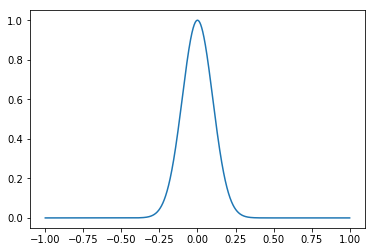

0.06149926439335227


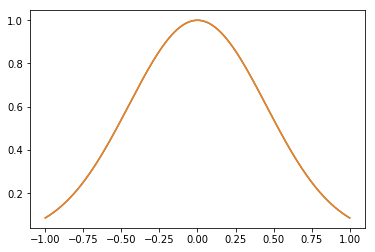

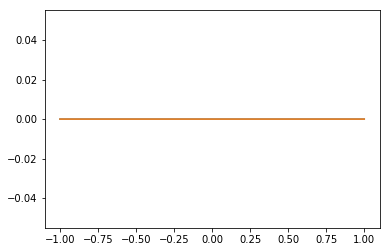

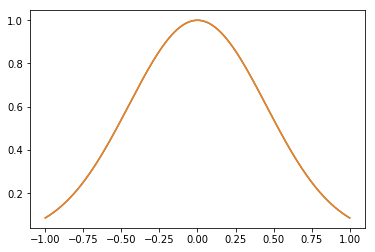

In [60]:
x,beam_vis = generate_gaussian_power_beam(0.0,0.1)
plt.plot(x,beam_vis)
plt.show()

means = numpy.asarray([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
lb = numpy.asarray([0.25,0.4,0.425,0.44,0.448,0.25,0.4,0.425,0.44,0.448,0.25,0.4,0.425,0.44])
ub = numpy.asarray([0.75,0.5,0.475,0.46,0.452,0.75,0.5,0.75,0.5,0.475,0.46,0.452,0.75,0.5])
sigmas = numpy.asarray([[0.25,0.75],
                    [0.4,0.5],
                    [0.425,0.475],
                    [0.44,0.46],
                    [0.448,0.452],
                    [0.25,0.75],
                    [0.4,0.5],
                    [0.425,0.475],
                    [0.44,0.46],
                    [0.448,0.452],
                    [0.25,0.75],
                    [0.4,0.5],
                    [0.425,0.475],
                    [0.44,0.46]])
#sigmas.shape
x,beams_matrix_vis,be = generate_gaussian_power_beams(locs_uvw,means,lb=0.45,ub=0.65,lbp=4.0,ubp=12.0)

plt.plot(x,beams_matrix_vis[2,:].real)
plt.show()
plt.plot(x,beams_matrix_vis[2,:].imag)
plt.show()
plt.plot(x,numpy.abs(beams_matrix_vis[2,:]))
plt.show()

In [61]:
def simulate_visibilities(layout,points,beam):
    
    vis_matrix = numpy.zeros(shape=(layout.shape[0],layout.shape[0]),dtype=numpy.complex128)
    
    for i in numpy.arange(layout.shape[0]):
        for j in numpy.arange(layout.shape[0]):        
            
            ud = layout[i,0] - layout[j,0]
            vd = layout[i,1] - layout[j,1]
            wd = layout[i,2] - layout[j,2]
            
            
            
            for p in numpy.arange(points.shape[0]):
            
                lp = points[p,0]
                mp = points[p,1]
                np = numpy.sqrt(1.0 - lp**2+mp**2) - 1.0
                
                b1 = find_beam_at_point(beam,points[p,:]) 
                #print(b1)
                b2 = find_beam_at_point(beam,points[p,:])
                bap = b1 * numpy.conj(b2) # Each antenna has same beam so square
                
                phase_factor = numpy.exp(-2j * numpy.pi * (ud*lp + vd*mp + wd*np))
                point_amp = points[p,2]
                vis_matrix[i,j] += point_amp * bap * phase_factor
                
    return vis_matrix


def simulate_visibilities_beams(layout,points,beams):
    
    vis_matrix = numpy.zeros(shape=(layout.shape[0],layout.shape[0]),dtype=numpy.complex128)
    
    for i in numpy.arange(layout.shape[0]):
        for j in numpy.arange(layout.shape[0]):        
            
            ud = layout[i,0] - layout[j,0]
            vd = layout[i,1] - layout[j,1]
            wd = layout[i,2] - layout[j,2]
            
            
            
            for p in numpy.arange(points.shape[0]):
            
                lp = points[p,0]
                mp = points[p,1]
                np = numpy.sqrt(1.0 - lp**2+mp**2) - 1.0
                b1 = find_beam_at_point(beams[i,:],points[p,:])
                
                b2 = find_beam_at_point(beams[j,:],points[p,:])
                bap = b1 * numpy.conj(b2) # Each antenna has same beam so square
                
                phase_factor = numpy.exp(-2j * numpy.pi * (ud*lp + vd*mp + wd*np))
                point_amp = points[p,2]
                vis_matrix[i,j] += point_amp * bap * phase_factor
                
    return vis_matrix  

In [68]:
print(beam_vis.shape)
print(beams_matrix_vis.shape)


(2000,)
(14, 2000, 2)


In [77]:
vis_mat2 = simulate_visibilities(locs_uvw,numpy.asarray(points),beam_vis[:,numpy.newaxis])
vis_mat2_db = simulate_visibilities_beams(locs_uvw,numpy.asarray(points),beams_matrix_vis)

beam_matrix_test = numpy.tile(beam[numpy.newaxis,:],(14,1))
print(beam_matrix_test.shape)
vis_mat2_db_test = simulate_visibilities_beams(locs_uvw,numpy.asarray(points),beam_matrix_test[:,:,numpy.newaxis])

u, s, vh = numpy.linalg.svd(baselines, full_matrices=True)
print(s)
print(beam_matrix_test.shape)

(14, 2000)
[[51.25991236 21.11109807  0.        ]
 [51.25991236 21.11109807  0.        ]
 [40.12370875 23.81142757  0.        ]
 [33.94804    20.66021405  0.        ]
 [40.12370875 23.81142757  0.        ]
 [42.08805584 26.53840364  0.        ]
 [26.53840364 24.00499948  0.        ]
 [26.53840364 24.00499948  0.        ]
 [42.08805584 26.53840364  0.        ]
 [40.12370875 23.81142757  0.        ]
 [33.94804    20.66021405  0.        ]
 [40.12370875 23.81142757  0.        ]
 [51.25991236 21.11109807  0.        ]
 [51.25991236 21.11109807  0.        ]]
(14, 2000)


In [78]:
vis_mat2.shape

(14, 14)

In [79]:
visibilities.shape

(14, 14)

In [80]:
closures_test = generate_closure_triads_tp(vis_mat2,List_of_antennas)
closures_test2 = generate_closure_triads_tp(vis_mat2_db,List_of_antennas)
closures_test3 = generate_closure_triads_tp(vis_mat2_db_test,List_of_antennas)
print(closures_test)
print(closures_test2)
print(closures_test3)

[1.31529797e-05 1.31529797e-05 1.31529797e-05 1.31529797e-05
 1.31529797e-05 1.31529797e-05 1.31529797e-05 1.31529797e-05]
[-1.0263338  -0.47292371 -1.46861638 -0.98732208 -0.74289222 -0.96137627
 -1.32468687  0.95863437]
[0.004876 0.004876 0.004876 0.004876 0.004876 0.004876 0.004876 0.004876]


In [81]:
print(calculate_closure_standard_deviation(closures_test))
print(calculate_closure_standard_deviation(closures_test2))
print(calculate_closure_standard_deviation(closures_test3))

1.4901161193847656e-08
0.6770357140786117
1.4901161193847656e-08


And now it works? FML

In [82]:
skycont_int = skycont * skycont.conj()

In [84]:
%%time
vismat_sky = simulate_visibilities_sky(locs_uvw, skycont_int, beam[:,numpy.newaxis])



CPU times: user 12min 59s, sys: 9.71 s, total: 13min 9s
Wall time: 14min 19s


In [88]:
closure_sky = generate_closure_triads_tp(vismat_sky,List_of_antennas)
print(closure_sky)

[-0.13337852 -0.13337852 -0.13337852 -0.13337852 -0.13337852 -0.13337852
 -0.13337852 -0.13337852]


# Okay let's test closure divergence for beams

In [50]:
def plot_closure_divergence_vs_beamdifferences(locs,ant_list):
    
    points = [[0.2,0.2,80],[0.05,0.3,40],[-0.45,0.45,790],[0.45,0.45,100],[0.45,-0.45,100],
              [-0.45,-0.45,100],[0.5,0.0,100],[0.0,0.5,80],[-0.5,0.0,100],[-0.5,-0.5,100],
              [-0.8,0.0,100],[0.8,0.0,100],[0.21,0.21,80],[0.205,0.205,100]]
    
    
    beam_params = [[0.448,0.452,5.0,10.0],
                  [0.44,0.46,5.0,10.0],
                  [0.425,0.475,5.0,10.0],
                  [0.4,0.5,5.0,10.0],
                  [0.25,0.75,5.0,10.0]]
    
    #beam_params = [ [0.25,0.75,5.0,10.0],
    #                [0.4,0.5,5.0,10.0],
    #                [0.425,0.475,5.0,10.0],
    #                [0.44,0.46,5.0,10.0],
    #                [0.448,0.452,5.0,10.0]]
    
    std_devs = numpy.zeros(shape=5)
    closures = numpy.zeros(shape=(5,numpy.asarray(ant_list).shape[0]))
    av_beam_errors = numpy.zeros(shape=5)
    for i,beam in enumerate(beam_params):
    
        means = numpy.zeros(shape=(locs_uvw.shape[0],1))
            
        x,beams,av_beam_error = generate_gaussian_power_beams(locs,means,beam[0],beam[1],beam[2],beam[3])
        av_beam_errors[i] = av_beam_error
        vismat = simulate_visibilities_beams(locs,numpy.asarray(points),beams)
        closures[i,:] = generate_closure_triads_tp(vismat,ant_list)
        std_devs[i] = calculate_closure_standard_deviation(closures[i,:])
        
    ticklabels = numpy.char.mod("%.2f",100*av_beam_errors) # Aaah numpy, your mysteries are deep and endless
    indices = numpy.arange(5)
    fig = plt.figure(figsize=(5,9))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    for i in indices:
        ir = numpy.full(closures.shape[1],i)
        ax1.scatter(ir,closures[i,:],c='b',marker='x')
    ax1.set_ylim(-numpy.pi,numpy.pi)
    #ax1.set_title('Closure Phase vs Beam Error')
    ax1.set_xlabel('Average Error Between Beams (%)')
    ax1.set_ylabel('Phase (Radians)')
    ax1.set_xticks(indices)
    ax1.set_xticklabels(ticklabels)
    ax1.set_ylim(-2.0,2.0)
    #ax2.bar(indices,std_devs)
    ax2.scatter(100*av_beam_errors,std_devs)
    print(100*av_beam_errors)
    print(std_devs)
    print((100*av_beam_errors).shape)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim(0.001,10.0)
    #ax2.set_xticks(indices)
    #ax2.set_xticklabels(ticklabels)
    ax2.set_xlabel('Average Error Between Beams(%)')
    ax2.set_ylabel('Standard Deviation (Radians)')
    plt.savefig("beamerror.pdf")
    plt.show()
        
    print(closures)
    print(std_devs)

0.0008907596844656667
0.003837052448786148
0.012107433065553052
0.028194355808082192
0.12390629194859747
[ 0.08907597  0.38370524  1.21074331  2.81943558 12.39062919]
[0.00389018 0.02012103 0.0375299  0.08131246 1.05950454]
(5,)


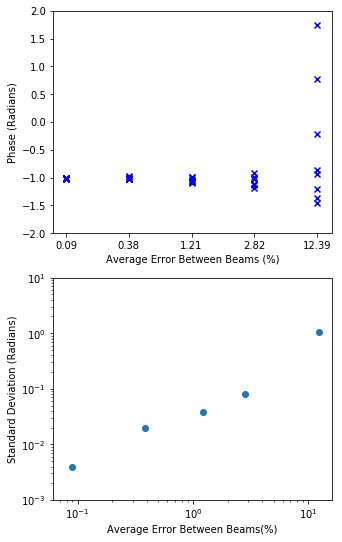

[[-1.01615968 -1.01082364 -1.01716974 -1.0181853  -1.01679174 -1.00777049
  -1.00937143 -1.01732332]
 [-1.02506757 -1.02928924 -1.02756421 -1.00961132 -0.97393868 -1.03451987
  -0.99668953 -1.03392387]
 [-1.05446258 -1.06794957 -0.98669185 -1.06880986 -0.99458939 -1.09571718
  -1.0763087  -1.02065021]
 [-1.18064683 -1.11919101 -0.91745349 -1.11229855 -1.02382273 -0.98825364
  -1.02717002 -1.12512301]
 [-0.93684711 -0.22118684  0.77894104 -1.46299603 -1.36330614 -1.19977261
   1.74075167 -0.85664255]]
[0.00389018 0.02012103 0.0375299  0.08131246 1.05950454]
CPU times: user 2.17 s, sys: 183 ms, total: 2.35 s
Wall time: 2.2 s


In [51]:
%%time
plot_closure_divergence_vs_beamdifferences(locs_uvw,List_of_antennas)

In [126]:
from matplotlib.ticker import FuncFormatter
def plot_closure_divergence_vs_nsr(locs,ant_list):
    
    points = [[0.2,0.2,80],[0.05,0.3,40],[-0.45,0.45,790],[0.45,0.45,100],[0.45,-0.45,100],
              [-0.45,-0.45,100],[0.5,0.0,100],[0.0,0.5,80],[-0.5,0.0,100],[-0.5,-0.5,100],
              [-0.8,0.0,100],[0.8,0.0,100],[0.21,0.21,80],[0.205,0.205,100]]
    
    
    nsr_params = [0.0001,
                  0.001,
                  0.01,
                  0.1,
                  1.0,
                  10.0,
                  100.0]
    
    std_devs = numpy.zeros(shape=len(nsr_params))
    closures = numpy.zeros(shape=(len(nsr_params),numpy.asarray(ant_list).shape[0]))
    for i,nsr in enumerate(nsr_params):
    
        means = numpy.zeros(shape=(locs_uvw.shape[0]))
            
        x,beam = generate_gaussian_power_beam(0.0,1.0)
                           
        
        vismat = simulate_visibilities(locs,numpy.asarray(points),beam[:,numpy.newaxis])
        #Simulate correlated gaussian noise
        autocorrs = numpy.diagonal(vismat)
        av_power = numpy.mean(autocorrs)
                           
        noise_scale_factor = av_power * nsr
        additive_correlated_noise = noise_scale_factor * (numpy.random.standard_normal((locs_uvw.shape[0],locs_uvw.shape[0])) + 
                           1j*numpy.random.standard_normal((locs_uvw.shape[0],locs_uvw.shape[0])))
        vismat += additive_correlated_noise
                           
                           
        closures[i,:] = generate_closure_triads_tp(vismat,ant_list)

        std_devs[i] = calculate_closure_standard_deviation(closures[i,:])
        
    ticklabels = numpy.char.mod("$10^{%d}$",numpy.round(numpy.log10(numpy.asarray(nsr_params))).astype(int)) # Aaah numpy, your mysteries are deep and endless
    indices = numpy.arange(len(nsr_params))
    
    fig = plt.figure(figsize=(5,9))
    #fig.suptitle('Closure Phase vs Noise-Signal Ratio (NSR) ')
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    for i in indices:
        ir = numpy.full(closures.shape[1],i)
        ax1.scatter(ir,closures[i,:],c='b',marker='x')
    ax1.set_ylim(-numpy.pi,numpy.pi)
    
    ax1.set_xlabel('Noise to Signal Ratio')
    ax1.set_ylabel('Phase (Radians)')
    ax1.set_xticks(indices)
    ax1.set_xticklabels(ticklabels)
    #ax2.bar(indices,std_devs)
    ax2.scatter(numpy.asarray(nsr_params),std_devs)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_ylim(0.0001,100.0)
    ax2.set_xlim(0.00005,250)
    #ax2.set_xticks(indices)
    #ax2.set_xticklabels(ticklabels)
    ax2.set_xlabel('Noise to Signal Ratio')
    ax2.set_ylabel('Circular Standard Deviation (Radians)')
    plt.savefig("nsrplot.pdf")
    plt.show()
        
    print(closures)
    print(std_devs)

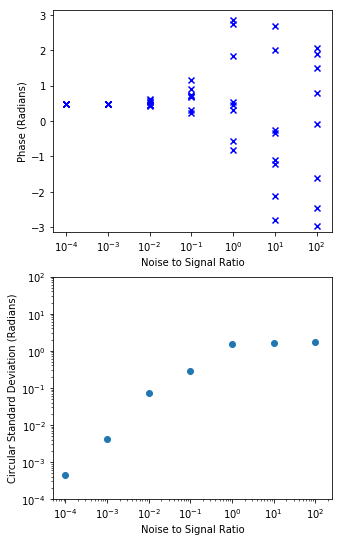

[[ 0.48734552  0.48582895  0.48661753  0.48627935  0.4863148   0.48635055
   0.4865255   0.48580208]
 [ 0.4922764   0.49118466  0.48561766  0.49046357  0.48669078  0.47935927
   0.48893234  0.49162297]
 [ 0.54861738  0.6232331   0.44653501  0.5880955   0.45695761  0.52643162
   0.412198    0.44643895]
 [ 0.22449437  0.71158537  1.16358877  0.31996769  0.72968761  0.89112898
   0.6814365   0.70321602]
 [ 0.43823572  0.31442196 -0.81442498  2.85482097  2.73371417 -0.56879446
   1.84125326  0.54620126]
 [-1.09421207 -2.10949652 -0.35140876  2.67021079 -2.7949199  -0.24295458
   2.00054508 -1.21871964]
 [-0.08987896 -1.62550738  2.06257454  1.89693777  0.77708411  1.50021812
  -2.97329425 -2.45297439]]
[4.55883207e-04 4.03065198e-03 7.16137657e-02 2.78795298e-01
 1.48525985e+00 1.59350433e+00 1.71672551e+00]


In [163]:
#plot_closure_divergence_vs_nsr
plot_closure_divergence_vs_nsr(locs_uvw,List_of_antennas)

In [128]:
def plot_efield_locs_triads(locs,ant_list):
    
    locs_uvw = locs/wavelength
    baselines = generate_baseline_vectors(locs_uvw)
    
    us = locs[:,0]
    vs = locs[:,1]
    ws = locs[:,2]
    
    us_uvw = baselines[:,:,0]
    vs_uvw = baselines[:,:,1]
    ws_uvw = baselines[:,:,2]

    fig = plt.figure(figsize=(5,9))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    ax1.scatter(us, vs, color='blue')
    
    for i in numpy.arange(locs.shape[0]):
        ax1.annotate(i,xy=(locs[i,0],locs[i,1]),xytext=(locs[i,0] + 2, locs[i,1] +0.75))
    
    for antenna in ant_list:
        bl1 = antenna[0]
        bl2 = antenna[1]
        bl3 = antenna[2]
        
        ax1.plot([us[bl1[0]],us[bl1[1]]],[vs[bl1[0]],vs[bl1[1]]],'r--')
        ax1.plot([us[bl2[0]],us[bl2[1]]],[vs[bl2[0]],vs[bl2[1]]],'r--')
        ax1.plot([us[bl3[0]],us[bl3[1]]],[vs[bl3[0]],vs[bl3[1]]],'r--')
    
    ax1.set_title('Electric Field Locations')
    ax1.set_xlim([-40,40])
    ax1.set_ylim([-40,40])
    ax1.set_xlabel('u'); ax1.set_ylabel('v');
    
    ax2.scatter(us_uvw, vs_uvw, color='blue', marker='^')
    ax2.set_title('Baseline Locations at 140 MHz')
    ax2.set_xlim([-30,30])
    ax2.set_ylim([-30,30])
    ax2.set_xlabel('u'); ax2.set_ylabel('v')
    
    plt.savefig('ant_bl_locs.pdf')
    plt.show()

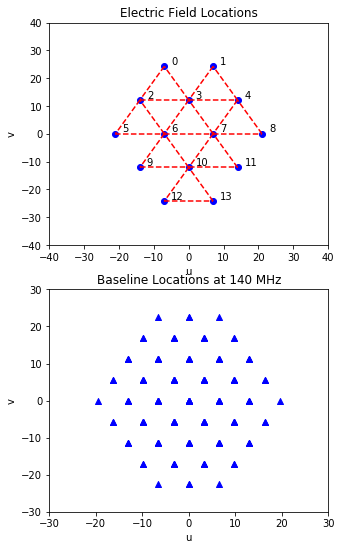

In [129]:
plot_efield_locs_triads(locs,List_of_antennas)